In [28]:
from astropy.table import Table, vstack, Column
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import astropy.units as u
from IPython.display import display, Math
import seaborn as sns

In [2]:
#decals_splus = Table.read('GalfitM_sex_DECALS_SPLUS_17_xmatch.csv')
#decals_splus

In [29]:
model = Table.read('GalfitM_DECALS_SPLUS_25_2.csv', format='ascii')
splus = Table.read('GalfitM_output_SPLUS.csv', format='ascii')
#s = splus.group_by('Group')
#keys = s.groups.keys
#print(keys)
#splus_26 = splus[splus['Group']==26]
#splus = splus[np.argsort(splus['Gal'])]
#model_235 = model[model['Group']==235]
#model_235
model = model[(model['mag_g'] < 19) & (model['mag_r'] < 19) & (model['mag_i'] < 19) & (model['mag_z'] < 19)]
splus = splus[(splus['MAG_G'] < 19) & (splus['MAG_R'] < 19) & (splus['MAG_I'] < 19) & (splus['MAG_Z'] < 19) ]
splus

<Table length=75>
brickid brickname objid ...       z_auto            e_z_auto     
 int64     str8   int64 ...      float64            float64      
------- --------- ----- ... ------------------ ------------------
 112777  0555m412  8183 ...  18.37052726745605 0.0555746108293533
 112777  0555m412  7925 ...  14.02805233001709  0.009748145006597
 159150  0310m312  1972 ... 17.146800994873047 0.0346018709242343
 159150  0310m312  1257 ...   17.4071102142334 0.0420990139245986
 159150  0310m312  1498 ...  15.81497859954834 0.0134116988629102
 324660  0131m010  1904 ... 16.450307846069336 0.0242835134267807
 164182  0533m302 10337 ... 17.940698623657227 0.0681576952338218
 164182  0533m302 10561 ... 16.847505569458008 0.0282723922282457
 164182  0533m302 10222 ... 15.931710243225098 0.0134834330528974
    ...       ...   ... ...                ...                ...
 151766  0167m327  6445 ... 16.876537322998047 0.0613319650292396
 151766  0167m327  6928 ... 18.316335678100582 0.2323977202177047
 151766  0167m327  9564 ... 15.250182151794434 0.0126543454825878
 151766  0167m327  7828 ... 14.486468315124512 0.0050582950934767
  11709  0315m747  2661 ...          19.175877         0.11707006
  11709  0315m747  2122 ...          20.210804         0.32588086
  86033  0531m477  8017 ...  19.22572898864746 0.3145896792411804
 119349  0530m397  2618 ... 17.711650848388672  0.096751183271408
 119349  0530m397  2328 ... 16.268444061279297 0.0555870234966278
 120459  0528m395 13073 ...  18.67441749572754 0.1508689075708389

In [30]:
# Mostrar los nombres de las columnas antes del cambio
#print("Nombres de columnas antes del cambio:", splus.colnames)

# Definir las columnas que deseas cambiar
columnas_a_cambiar = ['n_R', 'n_G', 'n_I', 'n_Z', 'RE_R', 'RE_G', 'RE_I', 'RE_Z', 'MAG_R', 'MAG_G', 'MAG_I', 'MAG_Z', 'e_n_R', 'e_n_G', 'e_n_I', 'e_n_Z', 'e_RE_R', 'e_RE_G', 'e_RE_I', 'e_RE_Z', 'e_MAG_R', 'e_MAG_G', 'e_MAG_I', 'e_MAG_Z']

# Crear un diccionario para mapear los nombres antiguos a los nuevos solo para las columnas específicas
column_mapping = {col: re.sub(r'_(G|R|I|Z)', lambda x: f'_{x.group(1).lower()}', col) for col in columnas_a_cambiar}

# Renombrar las columnas en la tabla
for old_name, new_name in column_mapping.items():
    if old_name in splus.colnames:
        splus.rename_column(old_name, new_name)
print(splus.colnames)

['brickid', 'brickname', 'objid', 'type', 'ra', 'dec', 'ebv', 'flux_g', 'flux_r', 'flux_i', 'flux_z', 'mag_w1', 'mag_w2', 'mag_w3', 'mag_w4', 'g_r', 'r_i', 'r_z', 'i_z', '_RAJ2000', '_DEJ2000', 'Group', 'Gal', 'RAJ2000', 'DEJ2000', 'zmemb', 'gmemb', 'FUV', 'NUV', 'Separation', 'ID', 'CHI2NU', 'XC_R', 'e_XC_R', 'YC_R', 'e_YC_R', 'MAG_r', 'e_MAG_r', 'RE_r', 'e_rE_r', 'n_r', 'e_n_r', 'AR_R', 'e_AR_R', 'PA_R', 'e_PA_R', 'XC_J0378', 'e_XC_J0378', 'YC_J0378', 'e_YC_J0378', 'MAG_J0378', 'e_MAG_J0378', 'RE_J0378', 'e_RE_J0378', 'n_J0378', 'e_n_J0378', 'AR_J0378', 'e_AR_J0378', 'PA_J0378', 'e_PA_J0378', 'XC_J0395', 'e_XC_J0395', 'YC_J0395', 'e_YC_J0395', 'MAG_J0395', 'e_MAG_J0395', 'RE_J0395', 'e_RE_J0395', 'n_J0395', 'e_n_J0395', 'AR_J0395', 'e_AR_J0395', 'PA_J0395', 'e_PA_J0395', 'XC_J0410', 'e_XC_J0410', 'YC_J0410', 'e_YC_J0410', 'MAG_J0410', 'e_MAG_J0410', 'RE_J0410', 'e_RE_J0410', 'n_J0410', 'e_n_J0410', 'AR_J0410', 'e_AR_J0410', 'PA_J0410', 'e_PA_J0410', 'XC_J0430', 'e_XC_J0430', 'YC_J043

In [31]:
filtros = ['g', 'r', 'i', 'z']
#filtros_splus = ['G', 'R', 'I', 'Z']
for filtro in filtros:        
    model['n_' + filtro] = pd.to_numeric(model['n_' + filtro], errors='coerce')
    model['RE_' +filtro] = pd.to_numeric(model['RE_' + filtro], errors = 'coerce')
    model['e_n_' + filtro] = pd.to_numeric(model['e_n_' + filtro], errors='coerce')
    model['e_RE_' + filtro] = pd.to_numeric(model['e_RE_' + filtro], errors='coerce')

for fil in filtros:
    splus['n_' + fil] = pd.to_numeric(splus['n_' + fil], errors='coerce')
    splus['RE_' +fil] = pd.to_numeric(splus['RE_' + fil], errors = 'coerce')
    splus['MAG_' +fil] = pd.to_numeric(splus['MAG_' + fil], errors = 'coerce')
    splus['e_n_' + fil] = pd.to_numeric(splus['e_n_' + fil], errors='coerce')
    splus['e_rE_' + fil] = pd.to_numeric(splus['e_rE_' + fil], errors='coerce')



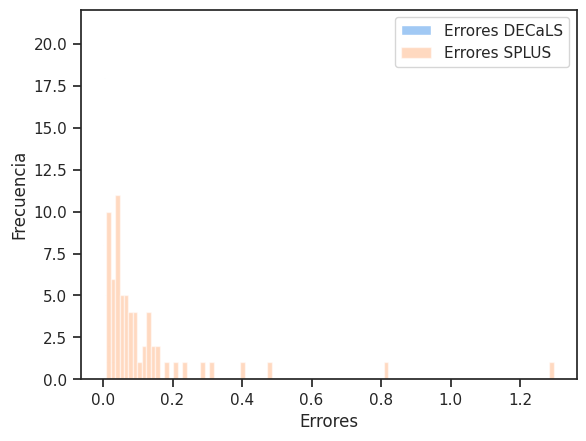

In [32]:
# Filtrar los NaN de los errores
errores_g_decals = model['e_RE_g']
errores_g_splus = splus['e_rE_g']

errores_filtrados_decals = errores_g_decals[(~np.isnan(errores_g_decals)) & (errores_g_decals != 0.0)]*0.262
errores_filtrados_splus = errores_g_splus[(~np.isnan(errores_g_splus)) & (errores_g_splus != 0.0)]*0.55

# Crear el histograma
plt.hist(errores_filtrados_decals, alpha=1, bins=100, label='Errores DECaLS')
plt.hist(errores_filtrados_splus, alpha=0.5, bins=100, label='Errores SPLUS')

# Ajustar los límites del eje x
#plt.xlim(0, 1)

# Etiquetas y leyenda
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

In [33]:
print(errores_filtrados_decals)
print(errores_filtrados_splus)

        e_RE_g        
----------------------
  0.004034800000000001
              0.003406
             0.0009694
             0.0075194
  0.015562800000000002
             0.0047946
             0.0034846
             0.0026462
  0.018837800000000002
             0.0204622
                   ...
              0.002489
 0.0019912000000000003
  0.008829400000000001
              0.004061
             0.0134406
              0.009301
             0.0017554
             0.0002358
5.2400000000000007e-05
             0.0689584
Length = 74 rows
       e_rE_g       
--------------------
             0.14729
             0.03641
            0.042295
             0.03113
0.014025000000000001
            0.048125
            0.041195
 0.09823000000000001
 0.13046000000000002
0.016005000000000002
                 ...
 0.04356000000000001
            0.064405
             0.01331
             0.01782
 0.08607500000000001
 0.16126000000000001
            0.150315
             0.80861
             

In [34]:
#Para el grupo 235
model_26 = model[model['Group_1']==26]
# Lista de filtros fotométricos
filtros = ['g', 'r', 'i', 'z']

# Supongamos que sersic es un DataFrame de pandas
# Asegúrate de que sersic tenga las mismas columnas que filtros
# Si las columnas no están en el mismo orden que los filtros, ajusta el orden
valores_sersic = np.array([model_26['n_' + filtro] for filtro in filtros])

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
for i in range(len(model_26)):
    gal = model['Gal_1'][i]
    plt.scatter(filtros, valores_sersic[:, i], label=f'Galaxy {gal}')

# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('n')
plt.title('n en cada filtro fotométrico para el SFCG 26')
plt.legend()
plt.tight_layout()
plt.ylim()

# Mostrar el gráfico
plt.show()

KeyError: 'Group_1'

In [35]:
# Lista de filtros fotométricos
filtros = ['g', 'r', 'i', 'z']

# Supongamos que sersic es un DataFrame de pandas
# Asegúrate de que sersic tenga las mismas columnas que filtros
# Si las columnas no están en el mismo orden que los filtros, ajusta el orden
valores_re = np.array([model_26['RE_' + filtro] for filtro in filtros])

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
for i in range(len(model_26)):
    gal = model_26['Gal_1'][i]
    #print(filtros)
    #print(valores_sersic[:, i])
    #print()
    plt.scatter(filtros, valores_re[:, i]*0.262, label=f'Galaxy {gal}')

# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('Re [arcsec]')
plt.title('Re en cada filtro fotométrico para el SFCG 26')
plt.legend()
plt.tight_layout()
plt.ylim()

# Mostrar el gráfico
plt.show()

NameError: name 'model_26' is not defined

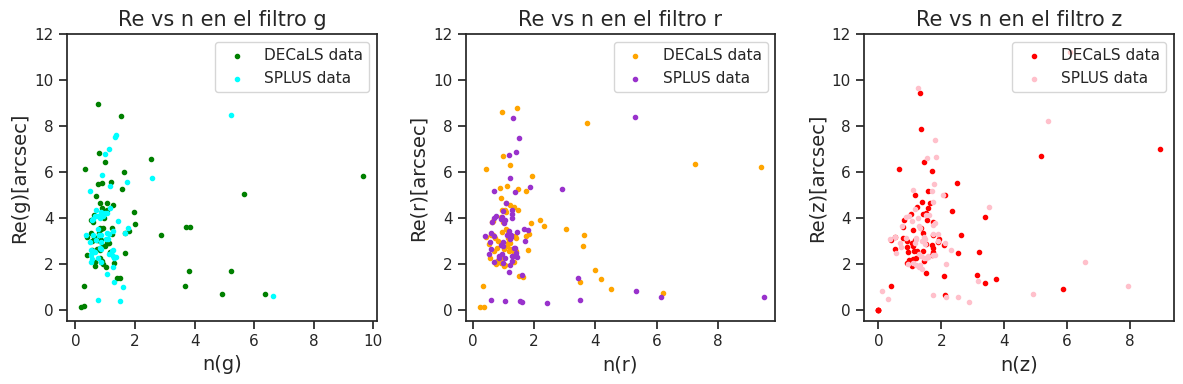

In [36]:
# Función para graficar Re vs n en grz.
def graficar_re_n(axs, archivo, color_g, color_r, color_z, label, pixel_scale):
    
    # Convertir las columnas de interés a tipos de datos numéricos
    for filtro in filtros:
        archivo['n_' + filtro] = pd.to_numeric(archivo['n_' + filtro], errors='coerce')
        archivo['RE_' +filtro] = pd.to_numeric(archivo['RE_' + filtro], errors = 'coerce')
    
    axs[0].scatter(archivo['n_g'], archivo['RE_g']*pixel_scale, label=label, color=color_g, marker='.')
    axs[0].set_xlabel('n(g)', fontsize = 14)
    axs[0].set_ylabel('Re(g)[arcsec]', fontsize=14)
    axs[0].set_title(f'Re vs n en el filtro g', fontsize=15)
    axs[0].set_xlim()
    axs[0].set_ylim(-0.5, 12)

    axs[1].scatter(archivo['n_r'], archivo['RE_r']*pixel_scale, label=label, color=color_r, marker='.')
    axs[1].set_xlabel('n(r)', fontsize = 14)
    axs[1].set_ylabel('Re(r)[arcsec]', fontsize=14)
    axs[1].set_title(f'Re vs n en el filtro r', fontsize=15)
    axs[1].set_xlim()
    axs[1].set_ylim(-0.5, 12)

    axs[2].scatter(archivo['n_z'], archivo['RE_z']*pixel_scale, label=label, color=color_z, marker='.')
    axs[2].set_xlabel('n(z)', fontsize = 14)
    axs[2].set_ylabel('Re(z)[arcsec]', fontsize=14)
    axs[2].set_title(f'Re vs n en el filtro z', fontsize=15)
    axs[2].set_xlim()
    axs[2].set_ylim(-0.5, 12)
    
    # Añadir leyenda en cada sub-gráfico
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Graficar
graficar_re_n(axs[:], model, 'green', 'orange', 'red', 'DECaLS data', 0.262)
graficar_re_n(axs[:], splus, 'cyan', 'darkorchid', 'pink', 'SPLUS data', 0.55)
# Ajustar diseño y mostrar gráficos
plt.legend()
plt.tight_layout()
plt.show()

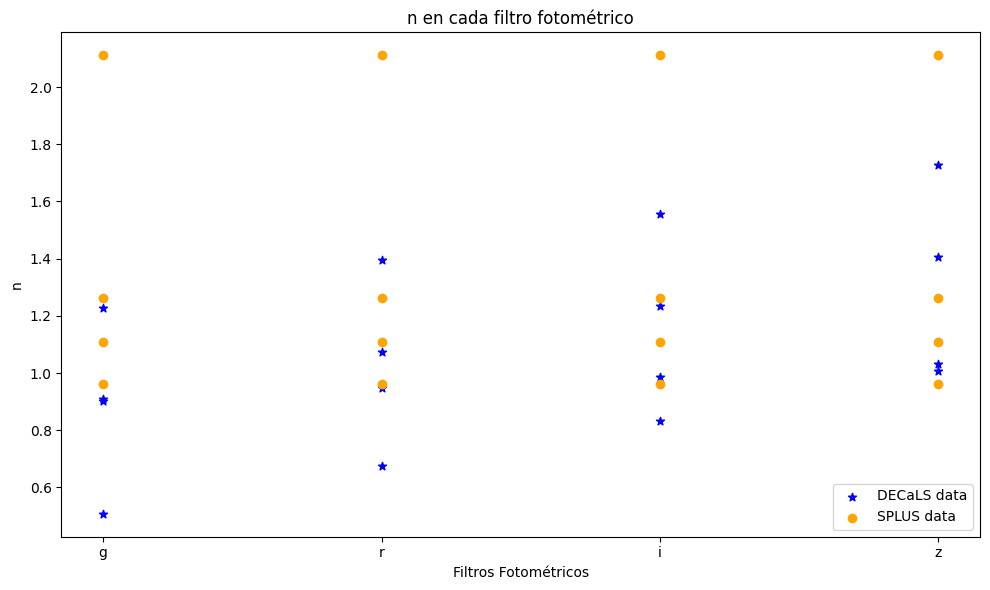

In [8]:
#Comparación entre ambos surveys para el grupo 235
splus_26 = splus[splus['Group'] == 26]

# Lista de filtros fotométricos
filtros = ['g', 'r', 'i', 'z']

# Convertir las columnas de interés a tipos de datos numéricos
for filtro in filtros:
    splus['n_' + filtro] = pd.to_numeric(splus['n_' + filtro], errors='coerce')
    #splus['MAG_' +filtro] = pd.to_numeric(splus['MAG_' + filtro], errors = 'coerce')
# Si las columnas no están en el mismo orden que los filtros, ajusta el orden
valores_sersic = np.array([model_26['n_' + filtro] for filtro in filtros])
valores_sersic_splus = np.array([splus_26['n_'+fil] for filtro in filtros])

# Convertir las columnas 'Gal' a Series de pandas
galaxias_model = pd.Series(model_26['Gal'])
galaxias_splus = pd.Series(splus_26['Gal'])

# Crear diccionario para mapear cada número de galaxia a un color único
galaxias = pd.concat([galaxias_model, galaxias_splus]).unique()
colores = plt.cm.rainbow(np.linspace(0, 1, len(galaxias)))
color_dict = {galaxia: color for galaxia, color in zip(galaxias, colores)}

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
for i in range(len(model_26)):
    gal = model_26['Gal'][i]
    color = color_dict[gal]
    plt.scatter(filtros, valores_sersic[:, i], marker='*', color='blue', label=f'DECaLS data')
    
for i in range(len(splus_26)):
    gal = splus_26['Gal'][i]
    color = color_dict[gal]
    plt.scatter(filtros, valores_sersic_splus[:, i], marker='o', color='orange', label='SPLUS data')
# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('n')
plt.title('n en cada filtro fotométrico')
#plt.legend()

# Evitar duplicados en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

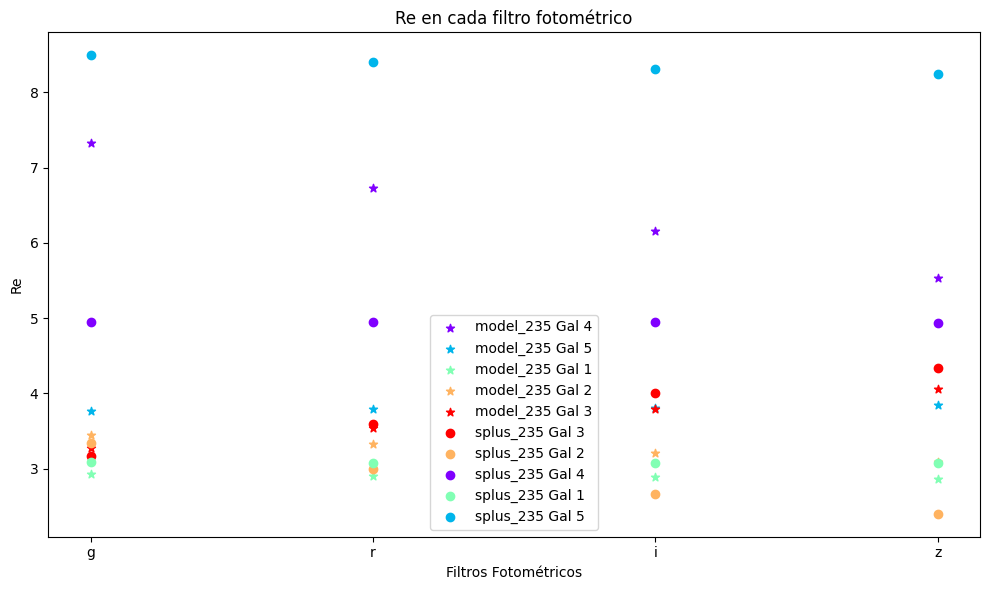

In [55]:
# Si las columnas no están en el mismo orden que los filtros, ajusta el orden
valores_re = np.array([model_235['RE_' + filtro] for filtro in filtros])
valores_re_splus = np.array([splus_235['RE_'+filtro] for filtro in filtros])

# Convertir las columnas 'Gal' a Series de pandas
galaxias_model = pd.Series(model_235['Gal'])
galaxias_splus = pd.Series(splus_235['Gal'])

# Crear diccionario para mapear cada número de galaxia a un color único
galaxias = pd.concat([galaxias_model, galaxias_splus]).unique()
colores = plt.cm.rainbow(np.linspace(0, 1, len(galaxias)))
color_dict = {galaxia: color for galaxia, color in zip(galaxias, colores)}

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
for i in range(len(model_235)):
    gal = model_235['Gal'][i]
    color = color_dict[gal]
    plt.scatter(filtros, valores_re[:, i]*0.262, marker='*', color=color, label=f'model_235 Gal {gal}')
    
for i in range(len(splus_235)):
    gal = splus_235['Gal'][i]
    color = color_dict[gal]
    plt.scatter(filtros, valores_re_splus[:, i]*0.55, marker='o', color=color, label=f'splus_235 Gal {gal}')
# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('Re')
plt.title('Re en cada filtro fotométrico')
#plt.legend()

# Evitar duplicados en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [38]:
valores_sersic = np.array([model['n_' + filtro] for filtro in filtros])
valores_sersic_splus = np.array([splus['n_'+filtro] for filtro in filtros])

errores_sersic = np.array([model['e_n_' + filtro] for filtro in filtros])
errores_sersic_splus = np.array([splus['e_n_' + filtro] for filtro in filtros])
# Función para calcular la mediana sin NaN y ceros
def calcular_mediana_sin_nan_ni_ceros(valores):
    # Filtrar NaN y ceros
    valores_filtrados = valores[(~np.isnan(valores)) & (valores != 0.0)]
    if len(valores_filtrados) > 0:
        return np.median(valores_filtrados)
    else:
        return np.nan
def calcular_errores(valores):
    valores_filtrados = valores[(~np.isnan(valores)) & (valores != 0.0)]
    if len(valores_filtrados) > 0:
        error = np.nanmedian(valores)
        return error

# Calcular medianas para cada filtro en 'valores_sersic'
medianas_valores_sersic = np.array([calcular_mediana_sin_nan_ni_ceros(valores_sersic[i]) for i in range(len(filtros))])

# Calcular medianas para cada filtro en 'valores_sersic_splus'
medianas_valores_sersic_splus = np.array([calcular_mediana_sin_nan_ni_ceros(valores_sersic_splus[i]) for i in range(len(filtros))])

#Calcular error de la mediana para cada filtro en 'valores_sersic'
error_valores_sersic = np.array([calcular_errores(errores_sersic[i]) for i in range(len(filtros))])

#Calcular error de la mediana para cada filtro en 'valores_sersic_splus'
error_valores_sersic_splus = np.array([calcular_errores(errores_sersic_splus[i]) for i in range(len(filtros))])

# Imprimir resultados
print("Medianas para valores_sersic:")
print(f'{medianas_valores_sersic} $\pm$ {error_valores_sersic}')

print("\nMedianas para valores_sersic_splus:")
print(f'{medianas_valores_sersic_splus} $\pm$ {error_valores_sersic_splus}')

Medianas para valores_sersic:
[0.953  1.1655 1.3639 1.4535] $\pm$ [0.0025 0.0015 0.0025 0.0035]

Medianas para valores_sersic_splus:
[1.00195 1.2119  1.3743  1.4869 ] $\pm$ [0.06115 0.0334  0.0493  0.0771 ]


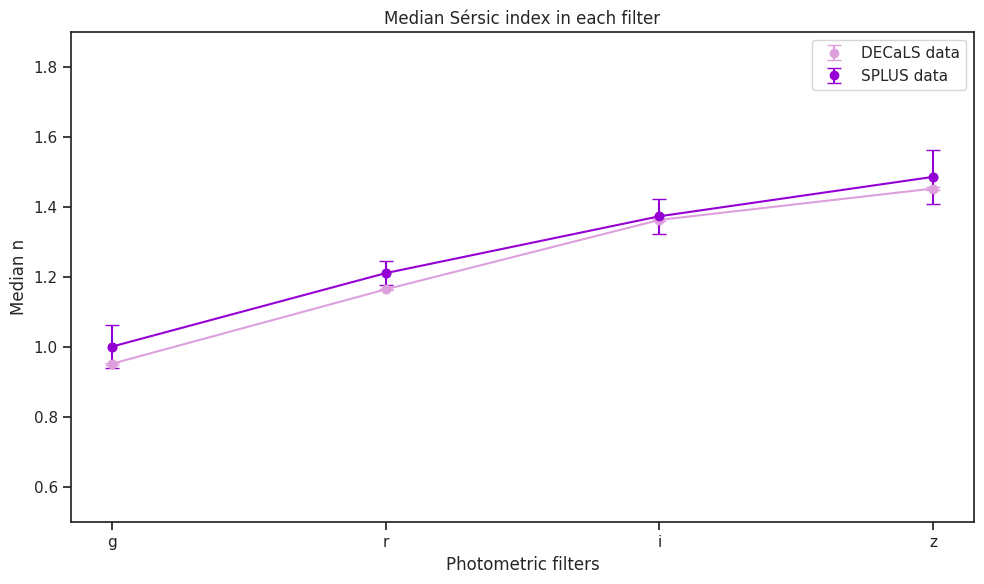

In [71]:
# Crear el gráfico de puntos con barras de error
plt.figure(figsize=(10, 6))

# Gráfico para valores_sersic con barras de error
plt.errorbar(filtros, medianas_valores_sersic, yerr=error_valores_sersic, fmt='o', capsize=5, color='plum', label='DECaLS data')
plt.plot(filtros, medianas_valores_sersic, color='plum', linestyle='-', marker='o')

# Gráfico para valores_sersic_splus con barras de error
plt.errorbar(filtros, medianas_valores_sersic_splus, yerr=error_valores_sersic_splus, fmt='o', capsize=5, color='darkviolet', label='SPLUS data')
plt.plot(filtros, medianas_valores_sersic_splus, color='darkviolet', linestyle='-', marker='o')

# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Photometric filters')
plt.ylabel('Median n')
plt.title('Median Sérsic index in each filter')
plt.legend()
plt.ylim(0.5, 1.9)


plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [40]:
valores_re = np.array([model['RE_' + filtro] for filtro in filtros])
valores_re_splus = np.array([splus['RE_'+filtro] for filtro in filtros])

errores_re = np.array([model['e_RE_' + filtro] for filtro in filtros])
errores_re_splus = np.array([splus['e_rE_' + filtro] for filtro in filtros])

# Calcular medianas para cada filtro en 'valores_sersic'
medianas_valores_re = np.array([calcular_mediana_sin_nan_ni_ceros(valores_re[i]) for i in range(len(filtros))])

# Calcular medianas para cada filtro en 'valores_sersic_splus'
medianas_valores_re_splus = np.array([calcular_mediana_sin_nan_ni_ceros(valores_re_splus[i]) for i in range(len(filtros))])

#Calcular error de la mediana para cada filtro en 'valores_sersic'
error_valores_re = np.array([calcular_errores(errores_re[i]) for i in range(len(filtros))])

#Calcular error de la mediana para cada filtro en 'valores_sersic_splus'
error_valores_re_splus = np.array([calcular_errores(errores_re_splus[i]) for i in range(len(filtros))])

# Imprimir resultados
print("Medianas para valores_re:")
print(f'{medianas_valores_re*0.262} $\pm$ {error_valores_re*0.262}')

print("\nMedianas para valores_re_splus:")
print(f'{medianas_valores_re_splus*0.55} $\pm$ {error_valores_re_splus*0.55}')

Medianas para valores_re:
[3.2851656 3.1880029 3.116883  3.0264799] $\pm$ [0.0033536 0.0021353 0.0031833 0.0049125]

Medianas para valores_re_splus:
[3.279375 3.161565 3.06944  2.995135] $\pm$ [0.060555 0.03773  0.0561   0.080025]


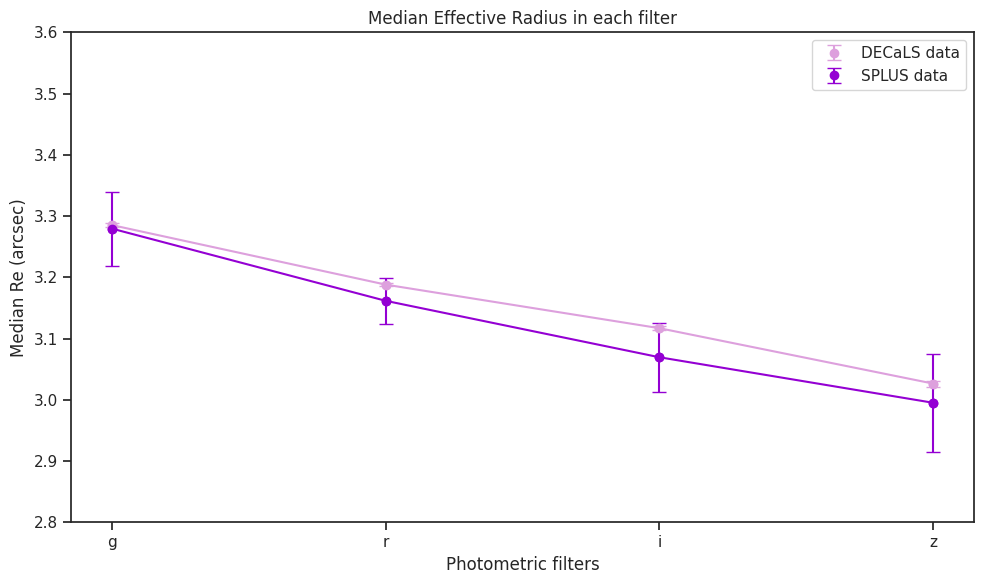

In [72]:
# Crear el gráfico de puntos con barras de error
plt.figure(figsize=(10, 6))

# Gráfico para valores_sersic con barras de error
plt.errorbar(filtros, medianas_valores_re*0.262, yerr=error_valores_re*0.262, fmt='o', capsize=5, color='plum', label='DECaLS data')
plt.plot(filtros, medianas_valores_re*0.262, color='plum', linestyle='-', marker='o')


# Gráfico para valores_sersic_splus con barras de error
plt.errorbar(filtros, medianas_valores_re_splus*0.55, yerr=error_valores_re_splus*0.55, fmt='o', capsize=5, color='darkviolet',label='SPLUS data')
plt.plot(filtros, medianas_valores_re_splus*0.55, color='darkviolet', linestyle='-', marker='o')

# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Photometric filters')
plt.ylabel('Median Re (arcsec)')
plt.title('Median Effective Radius in each filter')
plt.legend()
plt.ylim(2.8, 3.6)

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [44]:
# Obtener los grupos únicos en la tabla model
model_groups = set(model['Group'])

# Filtrar la tabla splus para que contenga solo los grupos presentes en model
filtered_splus = splus[np.isin(splus['Group'], list(model_groups))]


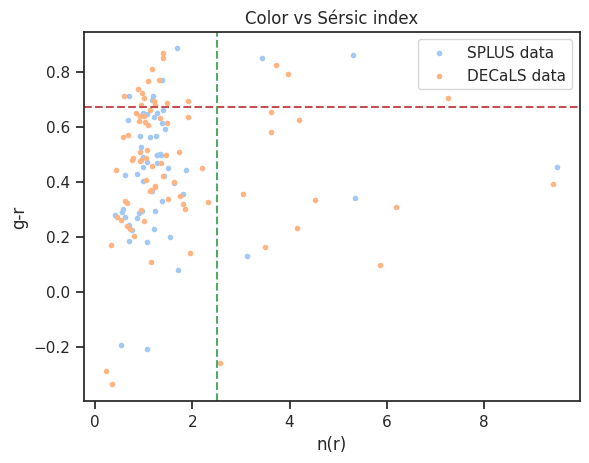

In [45]:
u_r_o = filtered_splus['MAG_g'] - filtered_splus['MAG_r']
g_r_model = model['mag_g'] - model['mag_r']
plt.scatter(filtered_splus['n_r'], u_r_o, marker='.', label='SPLUS data')
plt.scatter(model['n_r'], g_r_model, marker='.', label='DECaLS data')

#plt.ylim(-3, 5)
#plt.xlim(0, )
plt.title('Color vs Sérsic index')
plt.xlabel('n(r)')
plt.ylabel('g-r')
# Añadir una línea horizontal en y=50
plt.legend()
plt.axhline(y=0.67, color='r', linestyle='--')

# Añadir una línea vertical en x=2.5
plt.axvline(x=2.5, color='g', linestyle='--')
plt.show()

In [46]:
decals_data = Table.read('GalfitM_DECALS_SPLUS_25.csv')
filtros = ['g', 'r', 'i', 'z']
#filtros_splus = ['G', 'R', 'I', 'Z']
for filtro in filtros:        
    decals_data['n_' + filtro] = pd.to_numeric(decals_data['n_' + filtro], errors='coerce')
    decals_data['RE_' +filtro] = pd.to_numeric(decals_data['RE_' + filtro], errors = 'coerce')

In [47]:
grouped_decals = model.group_by('Group')

valid_groups=[]

for group in grouped_decals.groups:
    if any (group['zmemb'] != 0):
        valid_groups.append(group['Group'][0])

filtered_table = model[np.isin(model['Group'], valid_groups)]
filtered_table

<Table length=50>
Group  Gal    ID          ra        ...   FUV     NUV   Simbad Separation
int64 int64 int64      float64      ... float64 float64  str6   float64  
----- ----- ----- ----------------- ... ------- ------- ------ ----------
   20     1  1471 13.04012577583562 ... 19.5171 18.6617 Simbad        0.0
   20     4  1904 13.05099114252429 ... 19.6992 19.3486 Simbad        0.0
   26     4  7828 16.84741713183292 ... 19.5974 18.7922 Simbad        0.0
   26     1  6445 16.80270840320432 ...  19.734 19.2631 Simbad        0.0
   26     2  6928 16.81804207117206 ... 20.0433 19.8393 Simbad        0.0
   28     4 10387 20.29108124601455 ... 19.0883 18.6107 Simbad        0.0
   28     2  9141  20.2526136443005 ... 19.1253 18.6568 Simbad        0.0
   28     1  8846 20.24462727220963 ... 19.6806 19.5659 Simbad        0.0
   36     1   682 26.88918569427224 ... 17.3607 17.2249 Simbad        0.0
  ...   ...   ...               ... ...     ...     ...    ...        ...
  230     4  5257  27.4914190220405 ... 18.9147 18.3172 Simbad        0.0
  230     5  5644 27.50007935114963 ... 19.9607 19.4494 Simbad        0.0
  235     5  8148 66.77262982968402 ... 17.6725 17.0204 Simbad        0.0
  235     1  6575 66.71578600950266 ... 18.5235  18.163 Simbad        0.0
  235     2  6922 66.72834628857257 ... 19.9712 19.6633 Simbad        0.0
  235     3 10927 66.73140597687143 ... 18.8249 18.3212 Simbad        0.0
  271     6  5509 72.47271881132448 ... 18.4363 18.2064 Simbad        0.0
  271     4  4816 72.39819006470766 ... 19.5031 19.0108 Simbad        0.0
  271     2  4440 72.35695349024942 ... 17.1163 16.8631 Simbad        0.0
  271     3  4679 72.38381935125376 ... 16.8821 16.7737 Simbad        0.0

In [110]:
# Crear una función para reemplazar los valores de 'zmemb' que son 0
def replace_zeros(group):
    non_zero_values = group['zmemb'][group['zmemb'] != 0]
    if len(non_zero_values) > 0:
        replacement_value = non_zero_values[0]
        group['zmemb'] = np.where(group['zmemb'] == 0, replacement_value, group['zmemb'])
    return group

# Aplicar la función a cada grupo y unir los resultados
result_groups = []
for group in filtered_table.group_by('Group').groups:
    result_groups.append(replace_zeros(group))

final_table = vstack(result_groups)

final_table

<Table length=50>
Group  Gal    ID          ra        ...   FUV     NUV   Simbad Separation
int64 int64 int64      float64      ... float64 float64  str6   float64  
----- ----- ----- ----------------- ... ------- ------- ------ ----------
   20     1  1471 13.04012577583562 ... 19.5171 18.6617 Simbad        0.0
   20     4  1904 13.05099114252429 ... 19.6992 19.3486 Simbad        0.0
   26     4  7828 16.84741713183292 ... 19.5974 18.7922 Simbad        0.0
   26     1  6445 16.80270840320432 ...  19.734 19.2631 Simbad        0.0
   26     2  6928 16.81804207117206 ... 20.0433 19.8393 Simbad        0.0
   28     4 10387 20.29108124601455 ... 19.0883 18.6107 Simbad        0.0
   28     2  9141  20.2526136443005 ... 19.1253 18.6568 Simbad        0.0
   28     1  8846 20.24462727220963 ... 19.6806 19.5659 Simbad        0.0
   36     1   682 26.88918569427224 ... 17.3607 17.2249 Simbad        0.0
  ...   ...   ...               ... ...     ...     ...    ...        ...
  230     4  5257  27.4914190220405 ... 18.9147 18.3172 Simbad        0.0
  230     5  5644 27.50007935114963 ... 19.9607 19.4494 Simbad        0.0
  235     5  8148 66.77262982968402 ... 17.6725 17.0204 Simbad        0.0
  235     1  6575 66.71578600950266 ... 18.5235  18.163 Simbad        0.0
  235     2  6922 66.72834628857257 ... 19.9712 19.6633 Simbad        0.0
  235     3 10927 66.73140597687143 ... 18.8249 18.3212 Simbad        0.0
  271     6  5509 72.47271881132448 ... 18.4363 18.2064 Simbad        0.0
  271     4  4816 72.39819006470766 ... 19.5031 19.0108 Simbad        0.0
  271     2  4440 72.35695349024942 ... 17.1163 16.8631 Simbad        0.0
  271     3  4679 72.38381935125376 ... 16.8821 16.7737 Simbad        0.0

$log SFR_{NUV} (M_{\odot}yr^{-1}) = log L_{NUV}, corr(L_{\odot}) -9.33$


$log SFR_{FUV} (M_{\odot}yr^{-1}) = log L_{FUV}, corr(L_{\odot}) -9.51$

$A_{NUV} = -0.0495x^{3} + 0.4718x^{2} + 0.8998x + 0.2269$

$A_{FUV} = -0.0333y^{3} + 0.3522y^{2} + 1.1960y + 0.4967$


In [84]:
H_0 = 67.4 #km/s/Mpc
c = 300000
final_table['Distance (Mpc)'] = (final_table['zmemb']*c)/H_0
final_table

<Table length=50>
Group  Gal    ID          ra        ... Simbad Separation   Distance (Mpc)  
int64 int64 int64      float64      ...  str6   float64        float64      
----- ----- ----- ----------------- ... ------ ---------- ------------------
   20     1  1471 13.04012577583562 ... Simbad        0.0 183.55192878338278
   20     4  1904 13.05099114252429 ... Simbad        0.0  183.8278931750742
   26     4  7828 16.84741713183292 ... Simbad        0.0 159.39614243323442
   26     1  6445 16.80270840320432 ... Simbad        0.0  286.2017804154302
   26     2  6928 16.81804207117206 ... Simbad        0.0  283.9762611275964
   28     4 10387 20.29108124601455 ... Simbad        0.0 156.67655786350147
   28     2  9141  20.2526136443005 ... Simbad        0.0  323.1454005934718
   28     1  8846 20.24462727220963 ... Simbad        0.0  322.2551928783383
   36     1   682 26.88918569427224 ... Simbad        0.0 190.50445103857564
  ...   ...   ...               ... ...    ...        ...                ...
  230     4  5257  27.4914190220405 ... Simbad        0.0 190.79821958456972
  230     5  5644 27.50007935114963 ... Simbad        0.0  393.4495548961424
  235     5  8148 66.77262982968402 ... Simbad        0.0 259.40652818991094
  235     1  6575 66.71578600950266 ... Simbad        0.0 259.40652818991094
  235     2  6922 66.72834628857257 ... Simbad        0.0 259.40652818991094
  235     3 10927 66.73140597687143 ... Simbad        0.0 259.40652818991094
  271     6  5509 72.47271881132448 ... Simbad        0.0 122.17655786350149
  271     4  4816 72.39819006470766 ... Simbad        0.0 122.17655786350149
  271     2  4440 72.35695349024942 ... Simbad        0.0 122.17655786350149
  271     3  4679 72.38381935125376 ... Simbad        0.0 122.17655786350149

### Para calcular magnitud absoluta, utilizamos el módulo de distancia
$m - M = 5log(\frac{D}{1pc}) - 5$
### Para luego obtener la Luminosidad mediante
$L_{x} = 10^{-0.4(M_{x}-M_{\odot, x})}L_{\odot, x}$

### O también con flujo
$m_{x} = -2.5log(F) - 48.6$

## $F = 10^{-\frac{(m_{x} + 48.6)}{2.5}}$

$L = 4\pi D^2 F$


In [163]:
def calcular_ssfr(archivo):
    H_0 = 67.4 #km/s/Mpc
    c = 300000
    L_sun = 3.83*10**33
    eta_fuv = 1.98e+15
    eta_nuv = 1.32e+15
    eta_w3 = 2.5e+13
    eta_w4 = 1.25e+13

    archivo['Distance (Mpc)'] = (archivo['zmemb']*c)/H_0
    archivo['M_FUV'] = archivo['FUV'] - 5*np.log10(archivo['Distance (Mpc)']*1000000) + 5
    archivo['M_NUV'] = archivo['NUV'] - 5*np.log10(archivo['Distance (Mpc)']*1000000) + 5
    #Contiene transformación de sistema de referencia de Vega a AB
    #archivo['M_w3'] = archivo['mag_w3'] - 5*np.log10(archivo['Distance (Mpc)']*1000000) + 5
    #archivo['M_w4'] = archivo['mag_w4'] - 5*np.log10(archivo['Distance (Mpc)']*1000000) + 5
    archivo['M_z'] = archivo['mag_z'] - 5*np.log10(archivo['Distance (Mpc)']*1000000) + 5

    
    archivo['F_FUV'] = 10**(-(archivo['FUV']+48.6)/2.5)*eta_fuv
    archivo['F_NUV'] = 10**(-(archivo['NUV']+48.6)/2.5)*eta_nuv
    #archivo['F_w3'] = 10**(-(archivo['mag_w3']+48.6)/2.5)*eta_w3
    #archivo['F_w4'] = 10**(-(archivo['mag_w4']+48.6)/2.5)*eta_w4
    archivo['L_FUV'] = 4*np.pi*((archivo['Distance (Mpc)']*3.086*10**24)**2)*archivo['F_FUV']
    archivo['L_NUV'] = 4*np.pi*((archivo['Distance (Mpc)']*3.086*10**24)**2)*archivo['F_NUV']
    #archivo['L_w3'] = 4*np.pi*((archivo['Distance (Mpc)']*3.086*10**24)**2)*archivo['F_w3']
    #archivo['L_w4'] = 4*np.pi*((archivo['Distance (Mpc)']*3.086*10**24)**2)*archivo['F_w4']

    SFR_NUV=[]
    SFR_FUV=[]
    L=[]
    anuv=[]
    afuv=[]
    for i in range(len(archivo)):
        #Razón entre L_IR y L_FUV, NUV para la correción por polvo
        #x_nuv = np.log10(archivo['F_w4'][i]/archivo['F_NUV'][i])
        #y_fuv = np.log10(archivo['F_w4'][i]/archivo['F_FUV'][i])
        #Calculando A_nuv y A_fuv 
        #a_nuv = -0.0495*x_nuv**3 + 0.4718*x_nuv**2 + 0.8998*x_nuv + 0.2269
        #a_fuv = -0.0333*y_fuv**3 + 0.3522*y_fuv**2 + 1.1960*y_fuv + 0.4967

        #Calculando el flujo corregido por polvo
        #F_FUV = 10**(-(archivo['FUV'][i] - a_fuv + 48.6)/2.5)*eta_fuv
        F_NUV = 10**(-(archivo['NUV'][i] - 0.78 + 48.6)/2.5)*eta_nuv
        #Calculando la Luminosidad corregida en L_sun 
        #L_FUV_cor = (4*np.pi*((archivo['Distance (Mpc)'][i]*3.086e+24)**2)*F_FUV)/L_sun
        L_NUV_cor = (4*np.pi*((archivo['Distance (Mpc)'][i]*3.086e+24)**2)*F_NUV)/L_sun
        #L.append(L_FUV_cor)
        #Calculando la SFR en FUV y NUV
        #sfr_FUV = np.log10(L_FUV_cor) - 9.51
        sfr_NUV = np.log10(L_NUV_cor) - 9.33

        #anuv.append(a_nuv)
        #afuv.append(a_fuv)
        SFR_NUV.append(sfr_NUV)
        #SFR_FUV.append(sfr_FUV)

    archivo['logSFR_NUV'] = SFR_NUV
    #archivo['logSFR_FUV'] = SFR_FUV
    #print(anuv)
    #print(afuv)
    #print(min(anuv), max(anuv))
    #print(min(afuv), max(afuv))
    archivo['log(M_*)_z'] = (1.15 + 0.7*(archivo['mag_g'] - archivo['mag_z']) - 0.4*archivo['M_z'])*u.M_sun
    archivo['log_sSFR'] = archivo['logSFR_NUV'] - archivo['log(M_*)_z']
    return archivo
    
def filtrado(archivo):
    grouped = archivo.group_by('Group')

    valid_groups=[]

    for group in grouped.groups:
        if any (group['zmemb'] != 0):
            valid_groups.append(group['Group'][0])

    filtered_table = archivo[np.isin(archivo['Group'], valid_groups)]

    # Crear una función para reemplazar los valores de 'zmemb' que son 0
    def replace_zeros(group):
        non_zero_values = group['zmemb'][group['zmemb'] != 0]
        if len(non_zero_values) > 0:
            replacement_value = non_zero_values[0]
            group['zmemb'] = np.where(group['zmemb'] == 0, replacement_value, group['zmemb'])
        return group

    # Aplicar la función a cada grupo y unir los resultados
    result_groups = []
    for group in filtered_table.group_by('Group').groups:
        result_groups.append(replace_zeros(group))

    final_table = vstack(result_groups)

    # Función para verificar si un valor es numérico
    def is_number(value):
        try:
            float(value)
            return True
        except (ValueError, TypeError):
            return False

    # Convertir los valores enmascarados a string y eliminar espacios en blanco
    #final_table['mag_w4'] = [str(x).strip() for x in final_table['mag_w4']]

    # Crear una máscara booleana para los valores numéricos
    #mask = [is_number(x) for x in final_table['mag_w4']]

    # Aplicar la máscara para filtrar la tabla
    #final_table = final_table[mask]

    # Convertir la columna a tipo flotante
    #final_table['mag_w4'] = final_table['mag_w4'].astype(float)

    # Eliminar filas con valores NaN
    #final_table = final_table[~np.isnan(final_table['mag_w4'])]

    # Eliminar filas con valores infinitos
    #final_table = final_table[np.isfinite(final_table['mag_w4'])]
    #archivo = final_table
    archivo = final_table

    return archivo

In [167]:
model_ssfr = calcular_ssfr(filtrado(model))
model_ssfr = model_ssfr['Group', 'Gal', 'zmemb', 'ra', 'dec', 'log_sSFR', 'log(M_*)_z', 'RE_g', 'n_g', 'RE_r', 'n_r', 'RE_i', 'n_i', 'RE_z', 'n_z']
survey_column = Column(['DECALS'] * len(model_ssfr), name='Survey')

model_ssfr.add_column(survey_column)
model_ssfr.write('decals_for_plots', format='csv', overwrite=True)

In [162]:
splus_ssfr = calcular_ssfr((filtrado(splus)))
splus_ssfr = splus_ssfr['Group', 'Gal', 'zmemb', 'ra', 'dec', 'log_sSFR', 'log(M_*)_z', 'RE_g', 'n_g', 'RE_r', 'n_r', 'RE_i', 'n_i', 'RE_z', 'n_z']
survey_column = Column(['SPLUS'] * len(splus_ssfr), name='Survey')

splus_ssfr.add_column(survey_column)
splus_ssfr.write('splus_for_plots', format='csv')

In [119]:
median_ssfr_splus = np.nanmedian(splus_ssfr['log_sSFR'])
print(median_ssfr_splus)

-9.39722283897281


In [44]:
median_sfr = np.nanmedian(model_ssfr['logSFR_NUV'])
median_ssfr = np.nanmedian(model_ssfr['log_sSFR'])
print(median_sfr, median_ssfr)
for colname in model_ssfr.colnames:
    data = model_ssfr[colname]
    # Verificar si la columna es de tipo numérico
    if np.issubdtype(data.dtype, np.number):
        # Reemplazar inf y -inf por NaN solo en columnas numéricas
        data = np.where(np.isinf(data), np.nan, data)
        # Actualizar la columna en la tabla
        model_ssfr[colname] = data
model_ssfr

0.4243813469577056 -9.733740019249764


<Table length=37>
Group_1  Gal_1     ID   ...     log(M_*)_z           log_sSFR     
float64 float64 float64 ...      float64             float64      
------- ------- ------- ... ------------------ -------------------
   20.0     1.0  1471.0 ... 10.524380104954092 -10.268761710067075
   20.0     4.0  1904.0 ...   9.94679481968149 -10.172498474787597
   26.0     2.0  6928.0 ...   8.99147347381101  -8.204740830687935
   28.0     4.0 10387.0 ...  9.566650943324944  -9.829215704110583
   28.0     2.0  9141.0 ... 10.650334157768874  -10.17180232061411
   28.0     1.0  8846.0 ...  9.054485648762977  -8.068760638155668
   36.0     4.0  1575.0 ...  8.427353154395028  -8.695999560030973
   36.0     2.0   896.0 ...  8.762295276469306  -8.890825567158227
   39.0     1.0 10434.0 ... 11.139784561658004  -10.34874566931752
    ...     ...     ... ...                ...                 ...
   60.0     3.0  8183.0 ...  6.573764587914196  -8.343795286837874
   62.0     1.0 10483.0 ... 12.714729485668464 -10.338462355994855
   62.0     4.0 11409.0 ... 11.162686685668465  -8.414890612118148
   62.0     2.0 10649.0 ... 10.574308085668461  -8.002155527599879
   62.0     3.0 10694.0 ... 11.950754385668464  -9.677370524805783
  230.0     3.0  5015.0 ... 11.003801135618705 -10.302085207119958
  230.0     4.0  5257.0 ... 10.472579235618705 -10.048197888660999
  230.0     5.0  5644.0 ...  9.699725016670346  -9.049245694189695
  235.0     1.0  6575.0 ...   9.82320410256459  -9.406154814805983
  235.0     3.0 10927.0 ... 10.012319902564592  -9.596596853229522

In [25]:
decals_plots=Table.read('decals_for_plots', format='ascii')
splus_plots = Table.read('splus_for_plots', format='ascii')

decals_splus = vstack([decals_plots, splus_plots])
# Aplicar la condición para la columna 'Survey'
decals_splus['RE_g'] = np.where(decals_splus['Survey'] == 'SPLUS', decals_splus['RE_g']*0.55, decals_splus['RE_g']*0.262)

decals_splus['RE_r'] = np.where(decals_splus['Survey'] == 'SPLUS', decals_splus['RE_r']*0.55, decals_splus['RE_r']*0.262)

decals_splus['RE_z'] = np.where(decals_splus['Survey'] == 'SPLUS', decals_splus['RE_z']*0.55, decals_splus['RE_z']*0.262)

H_0 = 67.4 #km/s/Mpc

decals_splus['Distance (Mpc)'] = (decals_splus['zmemb']*300000)/H_0
decals_splus['RE_g(kpc)'] = (decals_splus['RE_g']*decals_splus['Distance (Mpc)'])/206.265
decals_splus['RE_r(kpc)'] = (decals_splus['RE_r']*decals_splus['Distance (Mpc)'])/206.265
decals_splus['RE_z(kpc)'] = (decals_splus['RE_z']*decals_splus['Distance (Mpc)'])/206.265

decals_splus

<Table length=93>
Group  Gal   zmemb   ...     RE_r(kpc)          RE_z(kpc)     
int64 int64 float64  ...      float64            float64      
----- ----- -------- ... ------------------ ------------------
   20     1 0.041238 ...  7.662975026649262  7.001552883810771
   20     4   0.0413 ...  3.402237255364434 3.0947409105612396
   26     4 0.035811 ... 2.4857441446092836 1.9489847348226308
   26     1   0.0643 ...  5.931026104602698  5.793427520458721
   26     2   0.0638 ...  5.968049729752591  5.725616759460924
   28     4   0.0352 ...  3.393954615008307  3.218445727065547
   28     2   0.0726 ...  8.463413117621657  8.119691627714369
   28     1   0.0724 ...  3.293853497355575 3.4347046311387768
   36     1   0.0428 ... 2.9732662748886676  2.729809409275225
  ...   ...      ... ...                ...                ...
  230     3 0.042866 ... 6.3661428784138065  6.151396020402725
  230     1 0.088744 ...  4.618776122243713   4.31775308663821
  230     5 0.088395 ...  5.360386569134331 4.6408983495562355
  235     2  0.05828 ... 3.7634729041556625   3.01615975271936
  235     1  0.05828 ... 3.8727615730995124 3.8642536577323643
  235     5  0.05828 ... 10.563649063990384 10.364231828189675
  269     2   0.0715 ...  3.562689856707481 3.5924758210193297
  269     5   0.0715 ... 3.7456486574378083  3.814385498157459
  269     6 0.070142 ... 0.6923781484896594                nan
  269     3   0.0568 ... 3.8751299231110687  3.658530364233559

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

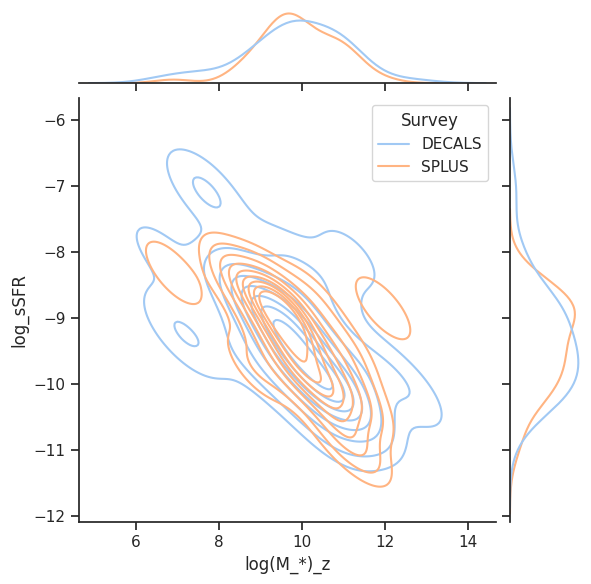

In [22]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_palette("pastel")
y=decals_splus['log_sSFR']
x=decals_splus['log(M_*)_z']
sur=decals_splus['Survey']

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=decals_splus,
    x=x, y=y, hue=sur,
    kind="kde",
    fill=False,
    #alpha=0.6
)

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

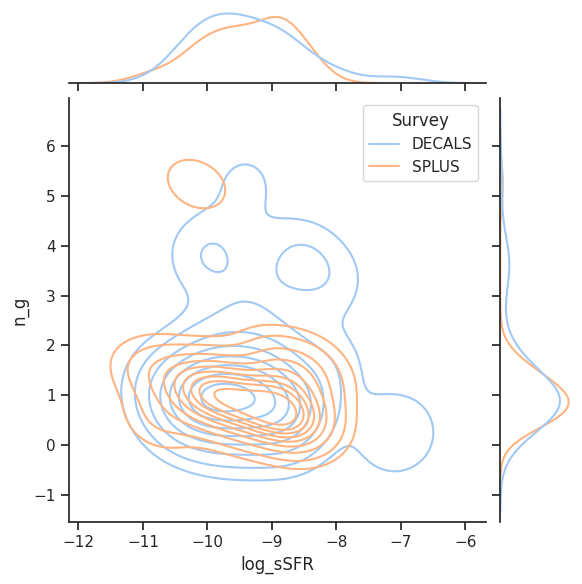

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

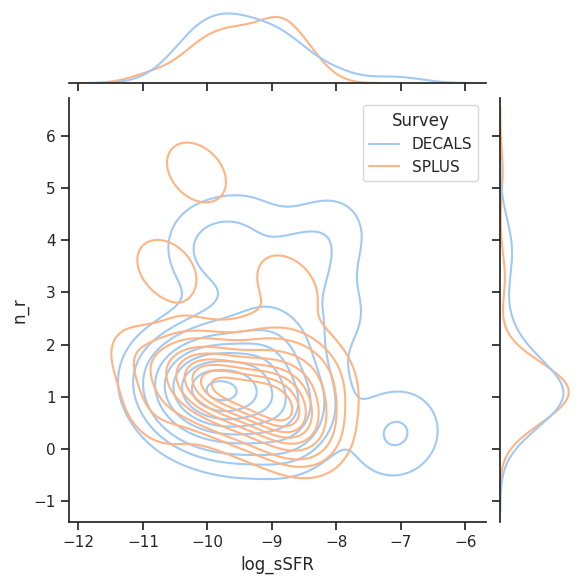

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

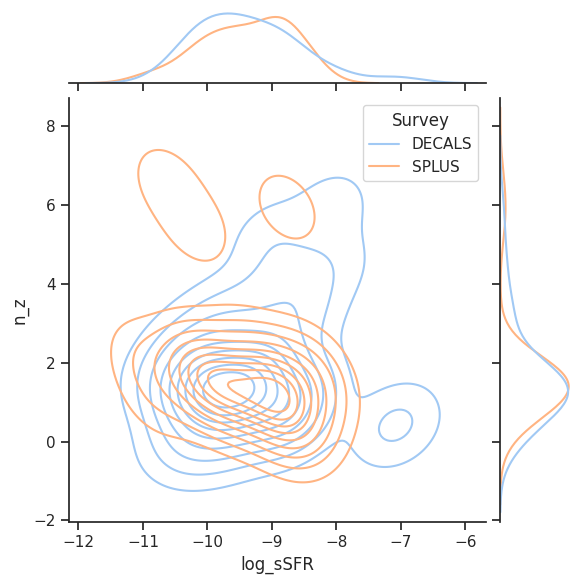

In [24]:
# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")

# Definir los datos
x = decals_splus['log_sSFR']
sur = decals_splus['Survey']

# Lista de columnas que quieres graficar
y_columns = ['n_g', 'n_r', 'n_z']

# Iterar sobre las columnas y crear un gráfico conjunto para cada una
for col in y_columns:
    sns.jointplot(
        data=decals_splus,
        x=x, y=decals_splus[col], hue=sur,
        kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
        fill=False,# Llenar las curvas para mejor visualización
        #alpha=0.6
    ).set_axis_labels("log_sSFR", f"{col}")
    
    plt.show()  # Mostrar cada gráfico por separado


/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

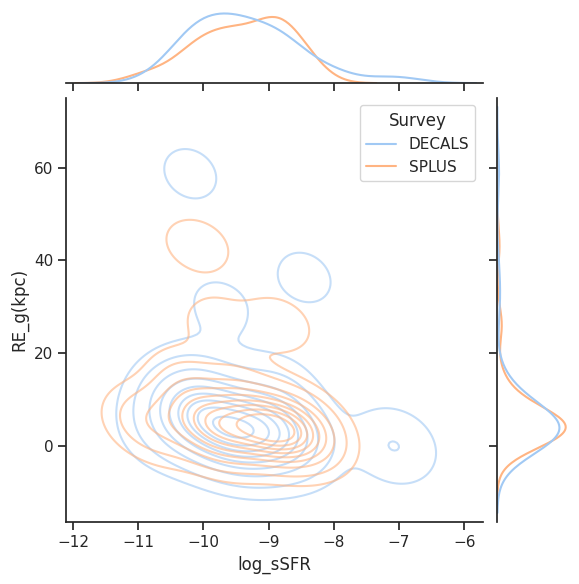

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

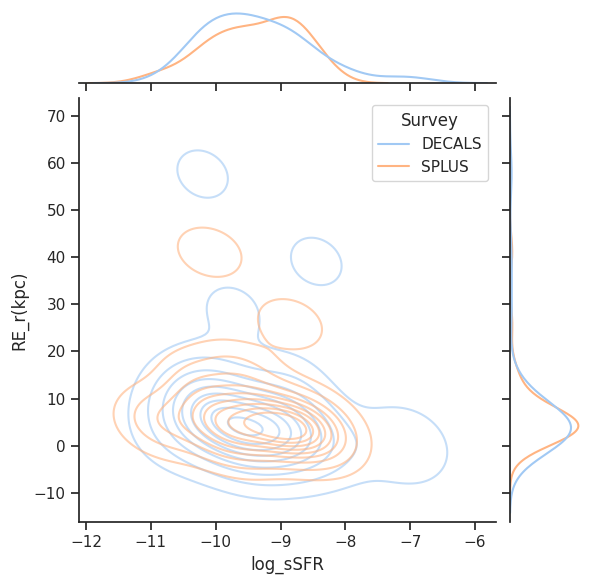

/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/seba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

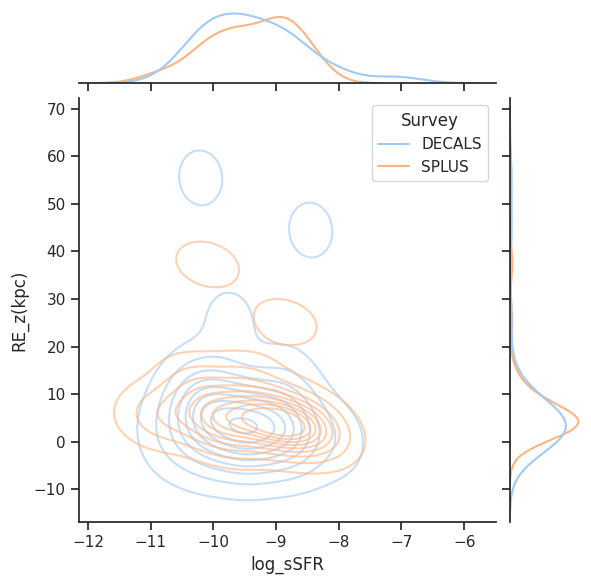

In [26]:
# Configurar el estilo de Seaborn
sns.set_theme(style="ticks")
sns.set_palette("pastel")
# Definir los datos
x = decals_splus['log_sSFR']
sur = decals_splus['Survey']

# Lista de columnas que quieres graficar
y_columns = ['RE_g(kpc)', 'RE_r(kpc)', 'RE_z(kpc)']

# Iterar sobre las columnas y crear un gráfico conjunto para cada una
for col in y_columns:
    sns.jointplot(
        data=decals_splus,
        x=x, y=decals_splus[col], hue=sur,
        kind="kde",  # Tipo de gráfico (kde para estimación de densidad)
        fill=False,  # Llenar las curvas para mejor visualización
        alpha=0.6
    ).set_axis_labels("log_sSFR", f"{col}")
    
    plt.show()  # Mostrar cada gráfico por separado